o2_download - LinearRegression
Mean Squared Error: 24.162210052424378


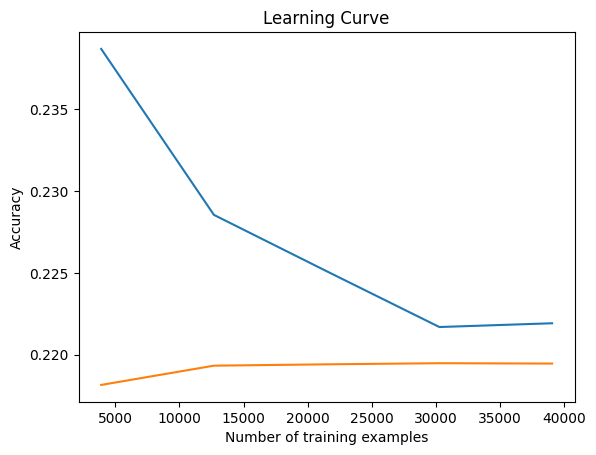

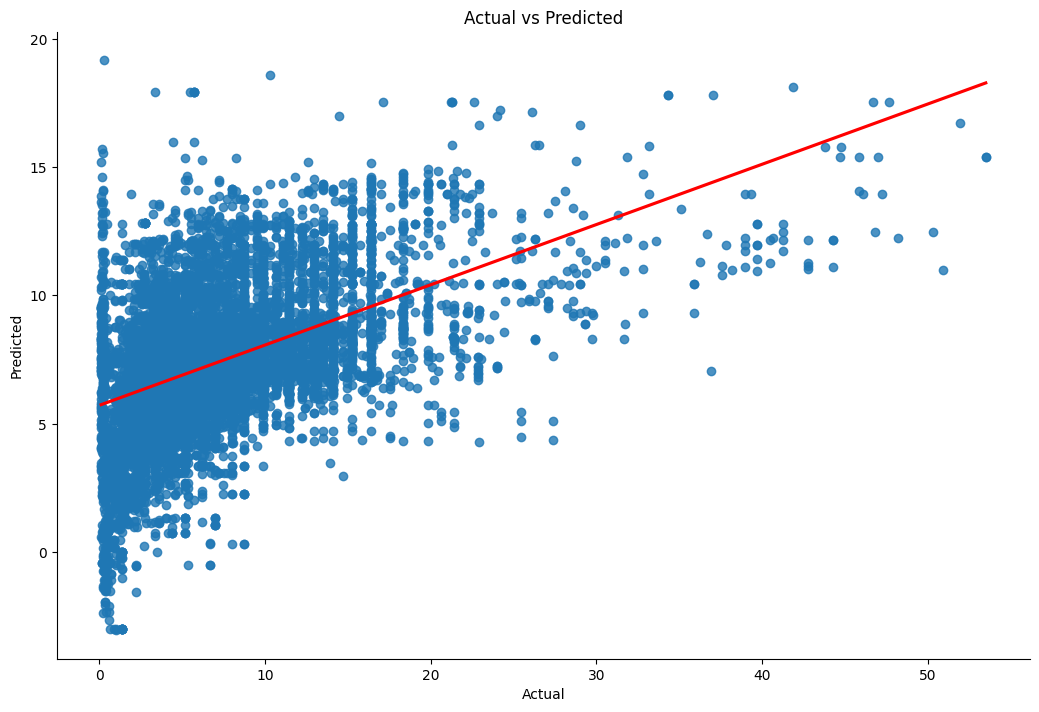

telekom_download - LinearRegression
Mean Squared Error: 755.4012590784957


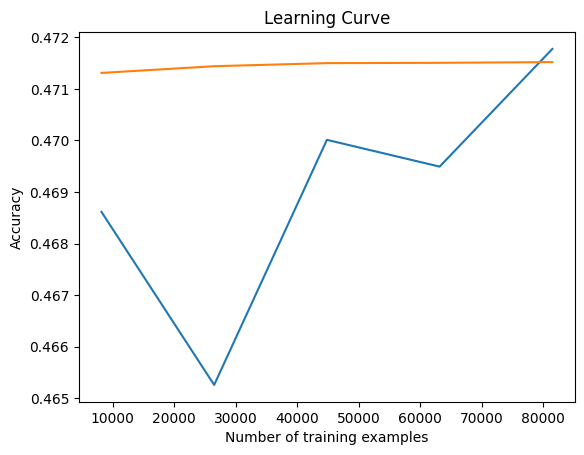

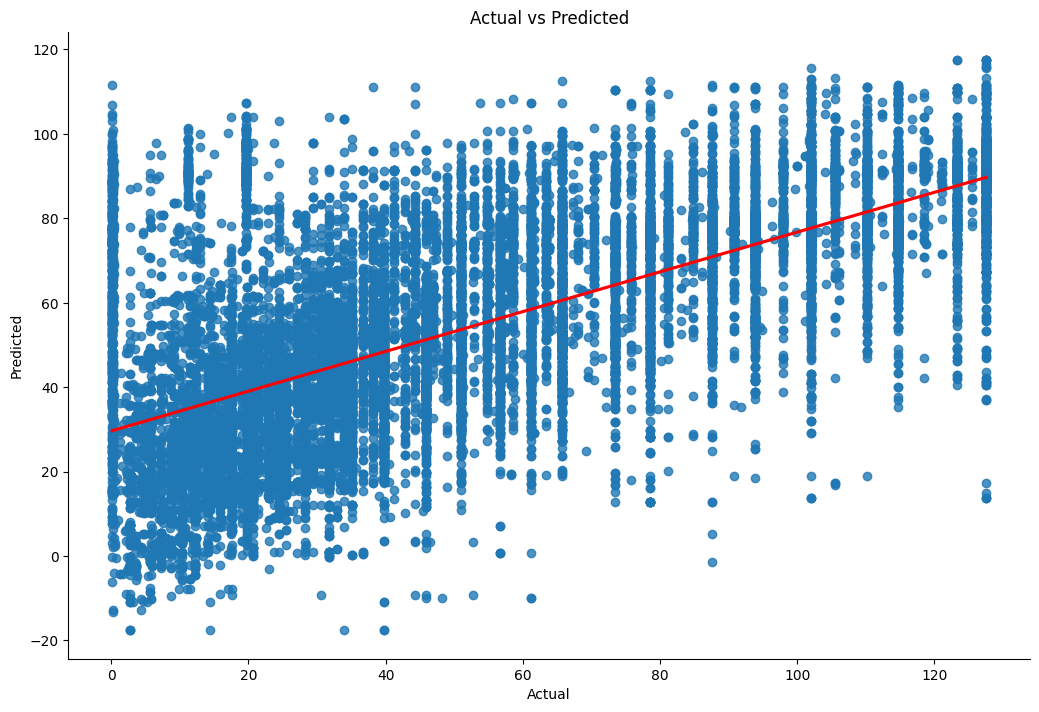

vodafone_download - LinearRegression
Mean Squared Error: 785.2698934282856


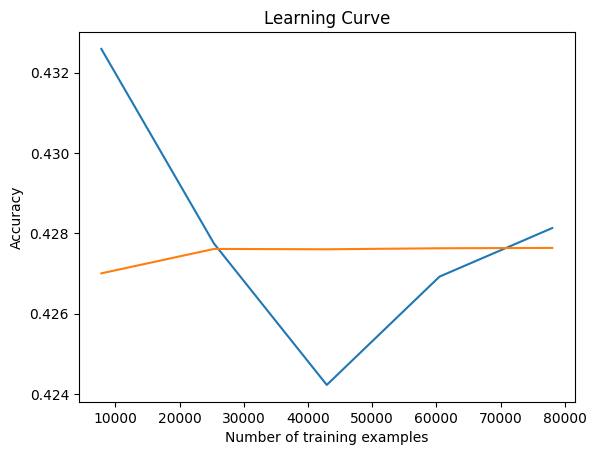

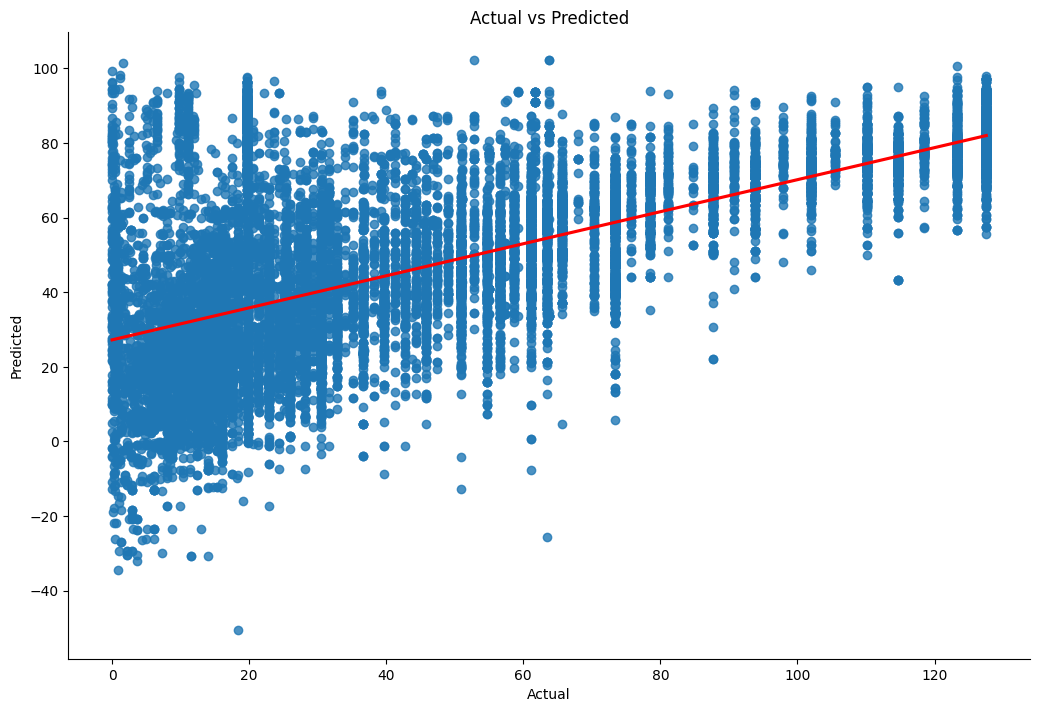

o2_download - RandomForestRegressor
Mean Squared Error: 25.191813775221462


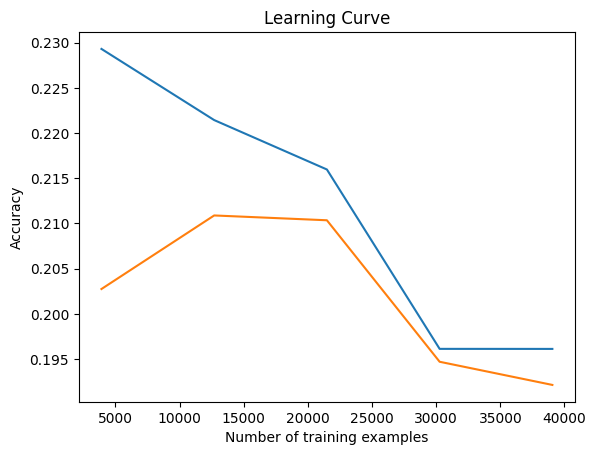

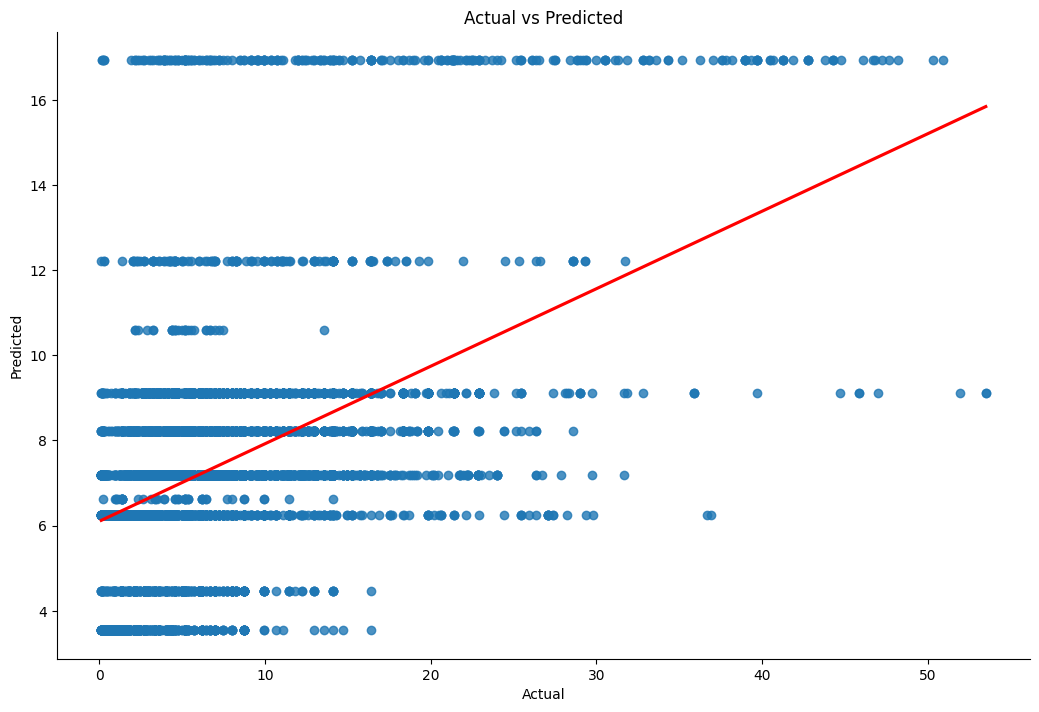

telekom_download - RandomForestRegressor
Mean Squared Error: 811.226739910221


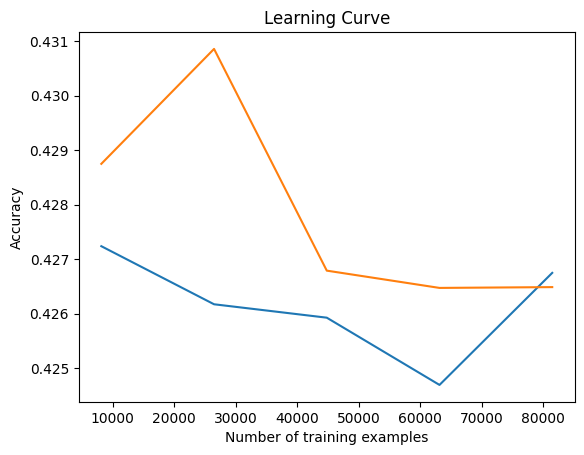

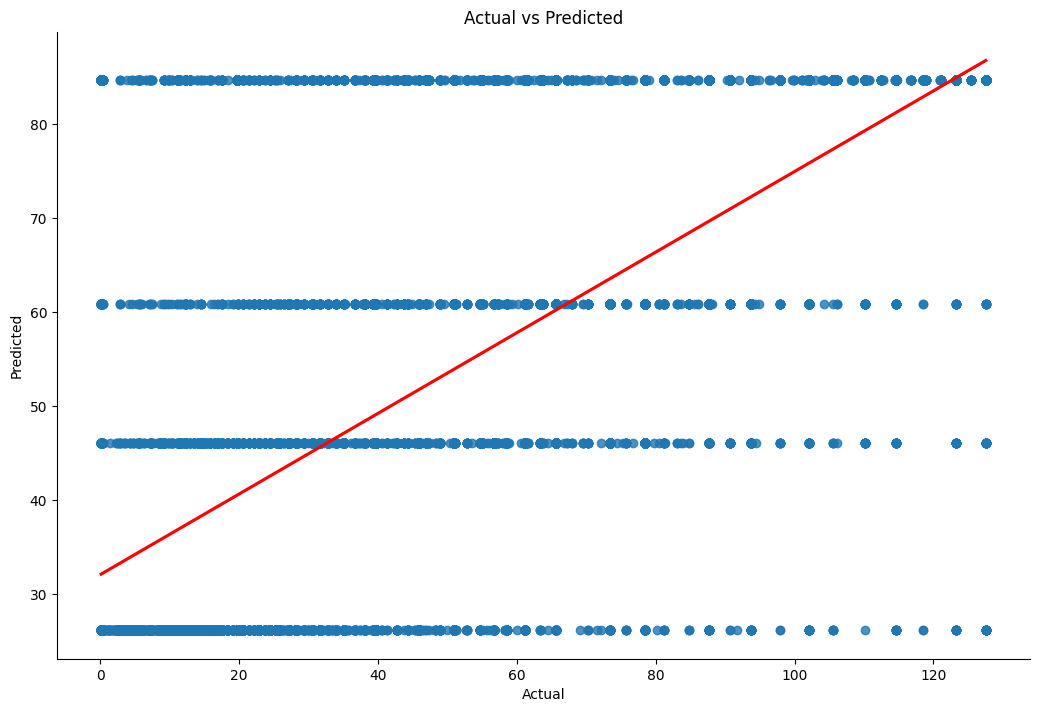

vodafone_download - RandomForestRegressor
Mean Squared Error: 782.7796117462426


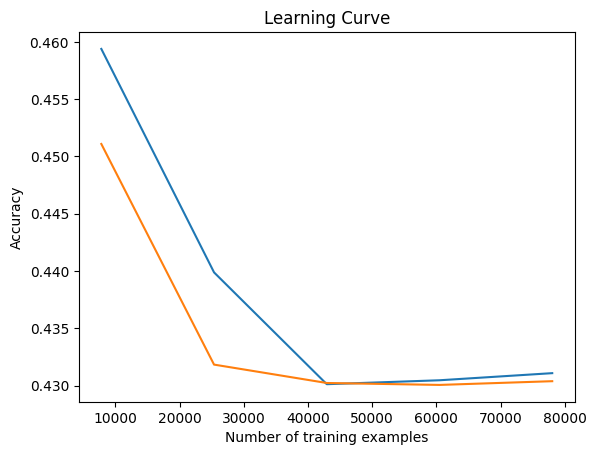

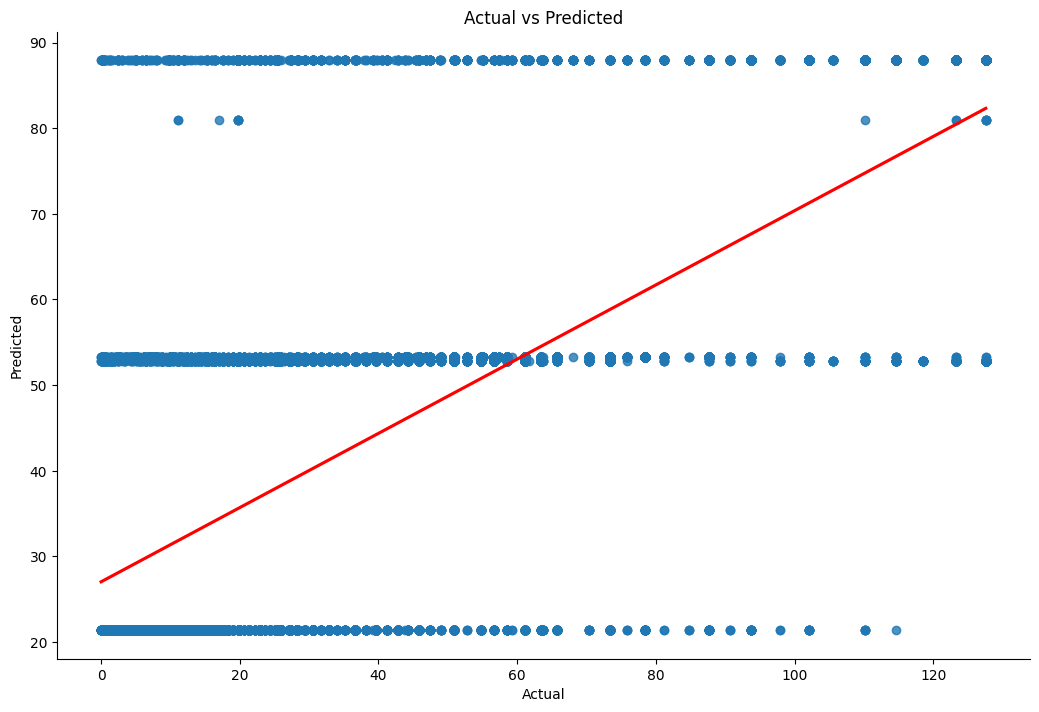

o2_upload - LinearRegression
Mean Squared Error: 7.632191958866241


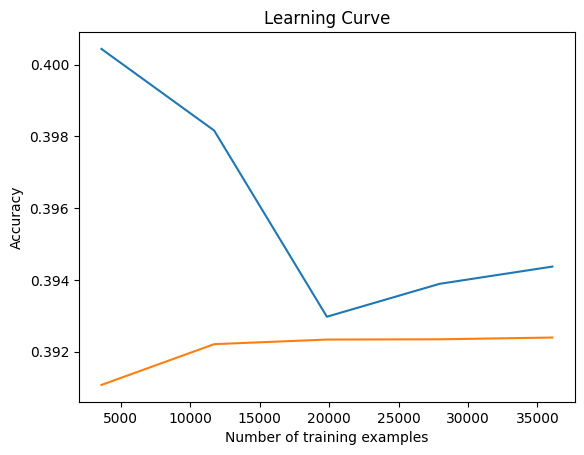

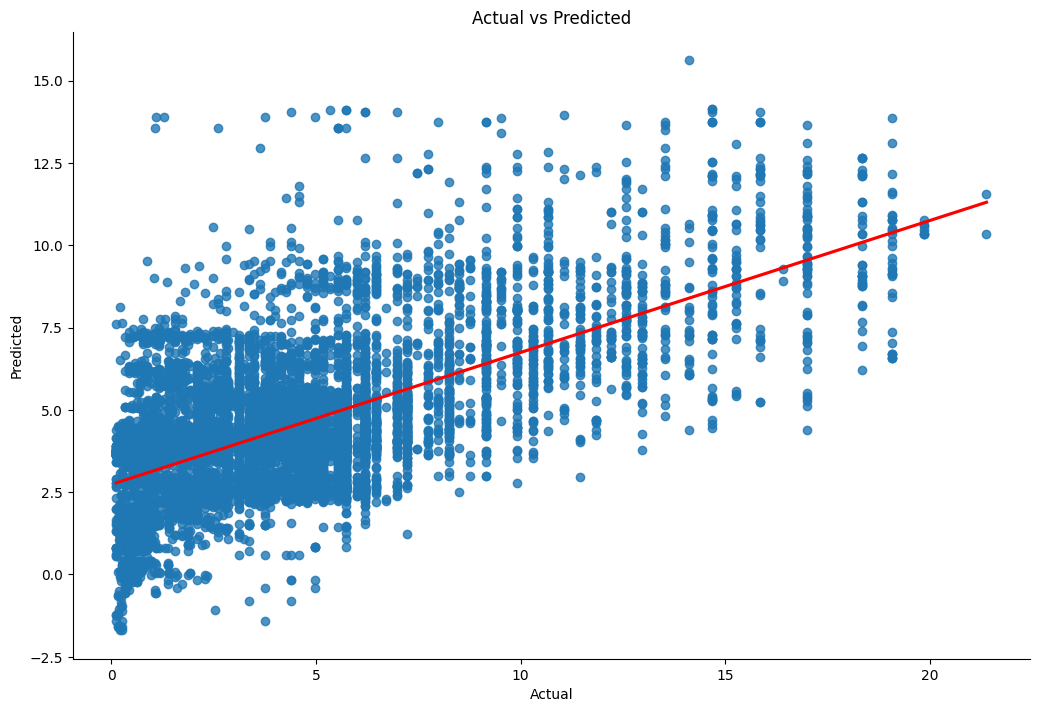

telekom_upload - LinearRegression
Mean Squared Error: 129.7558614312033


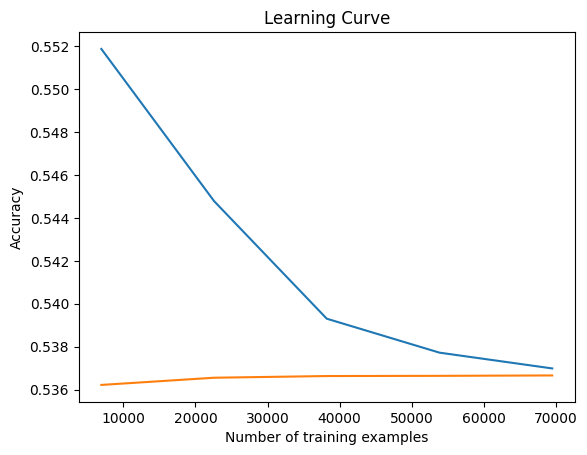

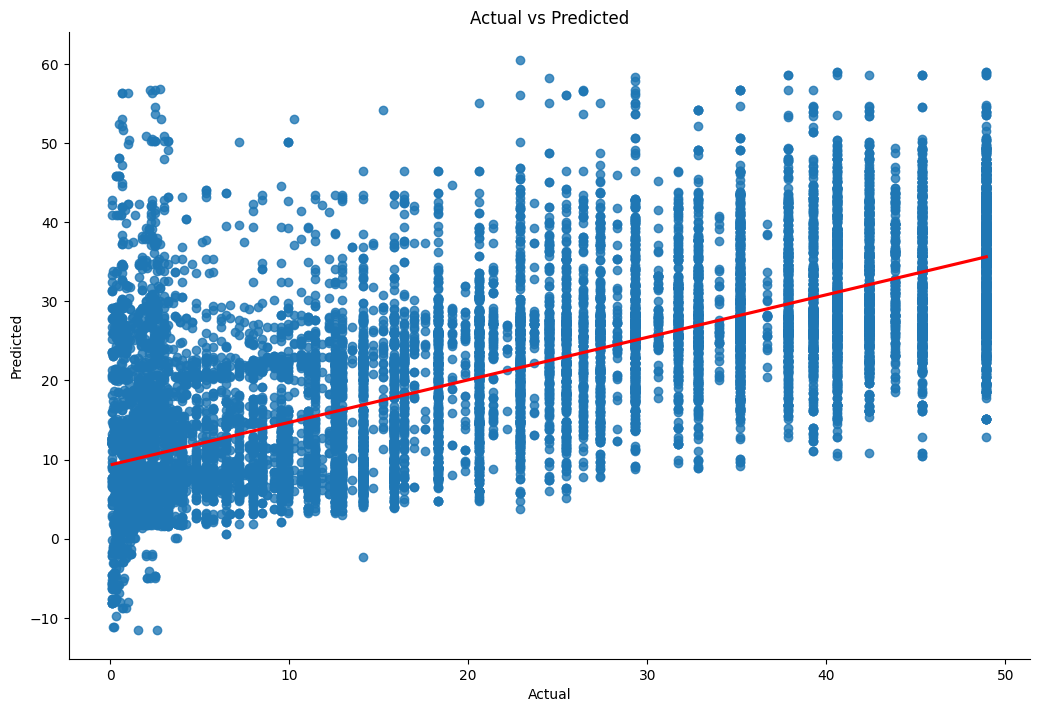

vodafone_upload - LinearRegression
Mean Squared Error: 52.05882466469957


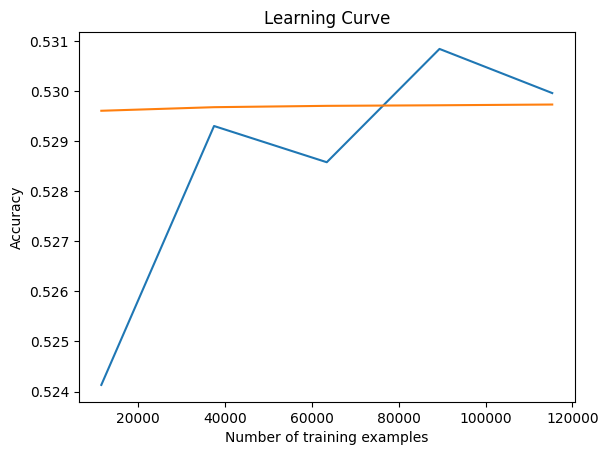

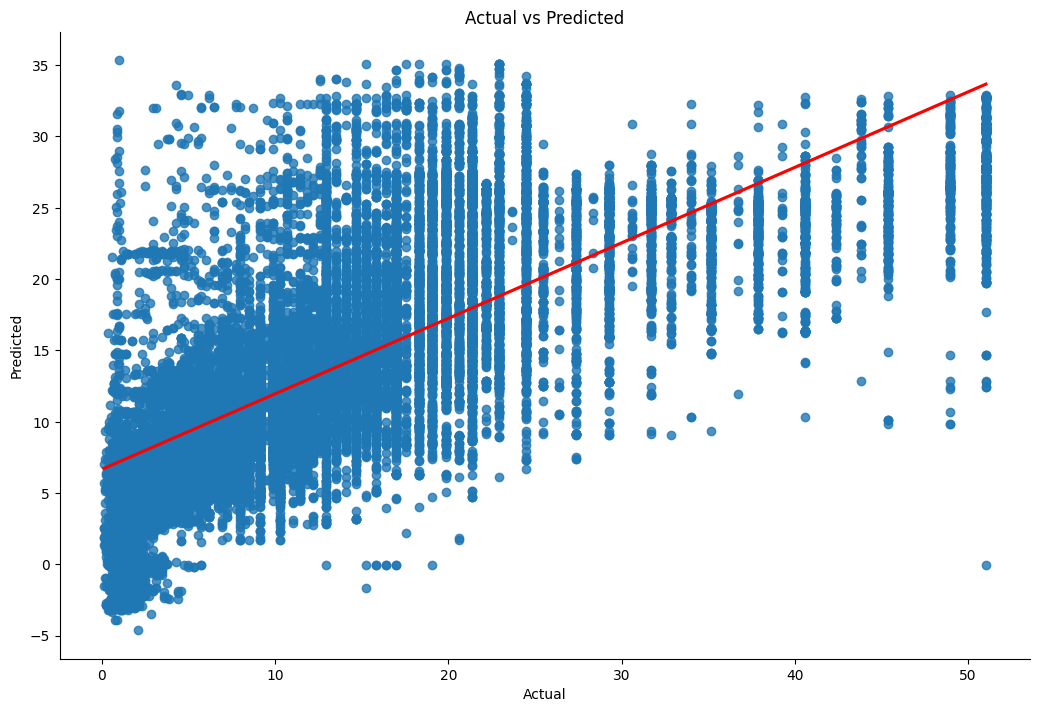

o2_upload - RandomForestRegressor
Mean Squared Error: 7.964836585743857


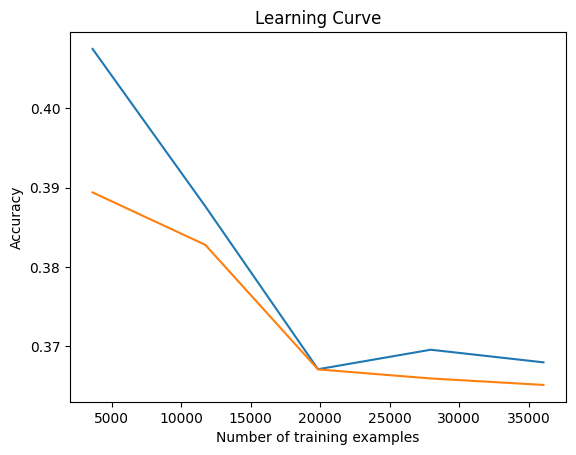

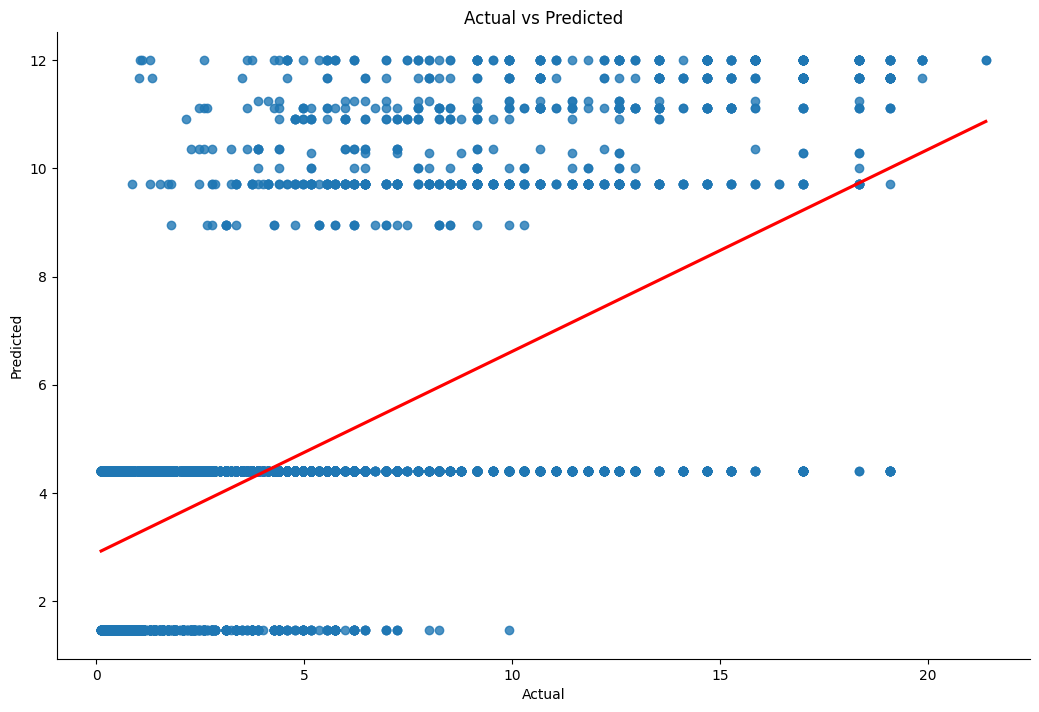

telekom_upload - RandomForestRegressor
Mean Squared Error: 122.86910686301795


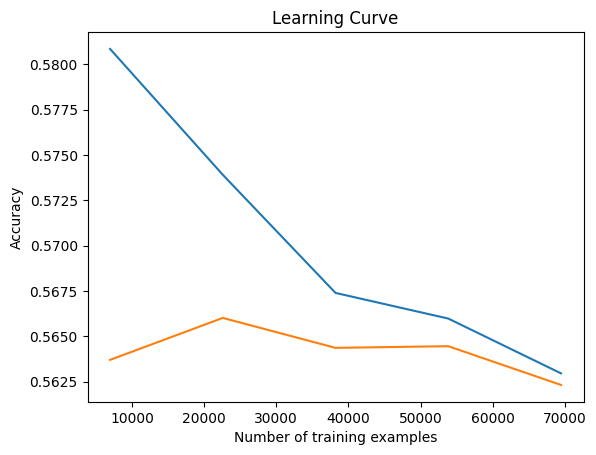

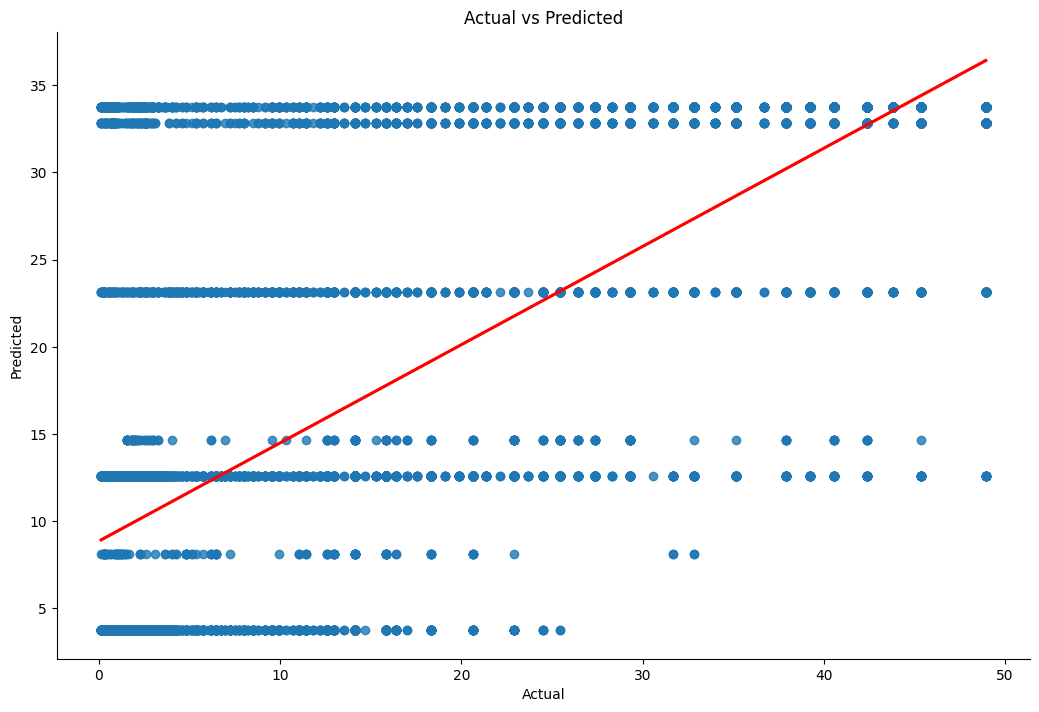

vodafone_upload - RandomForestRegressor
Mean Squared Error: 50.89567147995209


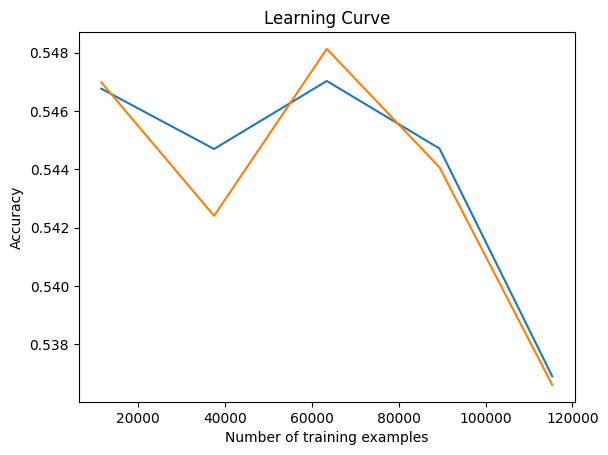

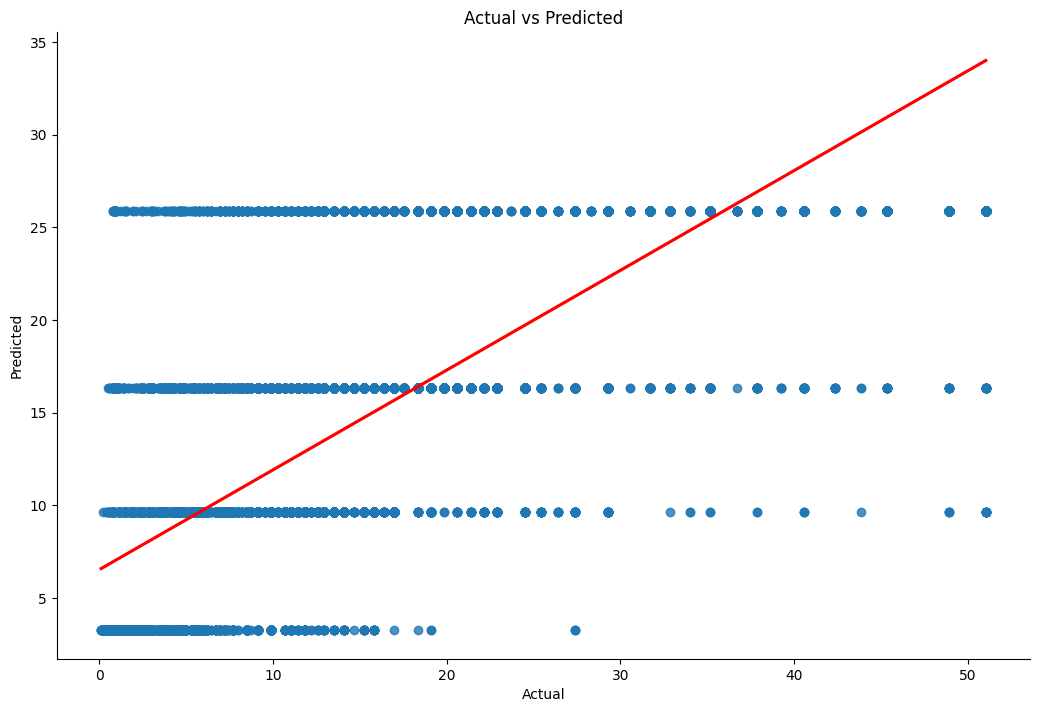

In [4]:
from ipynb.fs.full.functions import model_training, model_evaluation, plot_results, plot_learning_curve

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR


DATA_PATH = '../Campaign3/o2_download_nexus5x.csv'
X = ['rsrp', 'rsrq', 'cqi', 'longitude', 'latitude', 'speed']
y = 'throughput'
y_upload = 'tp_cleaned'

PROVIDERS_DOWNLOAD_PATHS = {
    'o2_download': '../Campaign3/o2_download_nexus5x.csv',
    'telekom_download': '../Campaign3/telekom_download_nexus5x.csv',
    'vodafone_download': '../Campaign3/vodafone_download_nexus5x.csv',
}

PROVIDERS_UPLOAD_PATHS = {
    'o2_upload': '../Campaign3/o2_upload_nexus5x.csv',
    'telekom_upload': '../Campaign3/telekom_upload_nexus5x.csv',
    'vodafone_upload': '../Campaign3/vodafone_upload_nexus5x.csv'
}

MODELS = {
    # 'SVR': SVR(kernel='linear', C=100, gamma='auto'),
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5),
}


for name, model in MODELS.items():
    for provider, path in PROVIDERS_DOWNLOAD_PATHS.items():    
        print(f'{provider} - {name}')
        y_test, y_pred = model_training(path, X, y, model)
        model_evaluation(y_test, y_pred)
        plot_results(y_test, y_pred)

for name, model in MODELS.items():
    for provider, path in PROVIDERS_UPLOAD_PATHS.items():
        print(f'{provider} - {name}')
        y_test, y_pred = model_training(path, X, y_upload, model)
        model_evaluation(y_test, y_pred)
        plot_results(y_test, y_pred)




